## HACKER EARTH - On The Plague Trail

 https://www.kaggle.com/shivammittal99/hackerearth-on-the-plague-trail

Predict the total number of people infected by the 7 different pathogens.

Plague is an epidemic event caused by Bacteria. A group of senior scientists misplaced a package containing fatal plague bacteria during one of their trips. With no means of tracking where the package is, scientists are now trying to come up with a solution to stop the plague. This plague has 7 different strains that are unique for each continent. This strain is expanding rapidly in each continent.

The dataset contains escalations of the plague for all the seven strains. The dataset is a time series in which the training set contains the number of individuals that are infected by the plague over a defined period of time.

Your mission, should you choose to accept it, is to defend the world against this plague by building an algorithm that can minimize the damage.

### No. Column Label Column Description

1.ID - A calculated unique ID for each research.

2.DateTime - Represents the data and time on which the event is recorded

3.TempOut - Outside Temperature

4.HiTemp - Highest Temperature

5.LowTemp - Lowest Temperature

6.OutHum - Outside Humidity

7.DewPt - Dew Point

8.WindSpeed - Wind Speed

9.WindDir - Wind Direction

10.WindRun - Wind Run Flow

11.HiSpeed - Highest Speed of the wind

12.HiDir - Direction of the wind which has highest speed

13.WindChill - Chillness of the wind

14.HeatIndex - Heat Index

15.THWIndex - THW Index

16.Bar - Barometer Reading

17.Rain - Rain

18.RainRate - Frequency of Rain

19.HeatDD - Heat DD

20.CoolDD - Cool DD

21.InTemp - Temperature Inside

22.InHum - Humidity Inside

23.InDew - Dew Inside

24.InHeat - Heat Inside

25.InEMC - EMC Inside

26.InAirDensity - Air Density

27.WindSamp - Wind - Attribute 1

28.WindTx - Wind - Attribute 2

29.ISSRecpt - Reception

30.ArcInt - Attribute

31.PA - Total No of People infected by Pathogen A

32.PB - Total No of People infected by Pathogen B

33.PC - Total No of People infected by Pathogen C

34.PD - Total No of People infected by Pathogen D

35.PE - Total No of People infected by Pathogen E

36.PF - Total No of People infected by Pathogen F

37.PG - Total No of People infected by Pathogen G

#### Data Given:

1. Train Data - 30 input variables, 7 target variables. 
2. Test Data - 30 input variables.
3. sample.csv - Need to predict 7 target variables of test data and create a csv file.

#### What to do
Given is the train data where based on the features, no. of people infected by Pathogen A,B,C,D,E,F,G are given. A model has to be built and trained with the data provided such that for a given set of conditions/features(test) it has to predict the no. of people that will get infected due to Pathogen A,B,C,D,E,F,G accurately.

As we have to predict the number of people infected due to the Pathogens this is a Regression Problem.

Root Mean Squared Error : Used to measure the differences between actual and predicted values.

RMSE = sqrt(mean(actual-predicted)^2)

#### Evaluation based on Root Mean Squared Error (RMSE).

score = max(0,(100 - rmse))

#### Reading train and test data into a dataframe

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data=pd.read_csv('train.csv')
#label=data[['PA','PB','PC','PD','PE','PF','PG']]
#data.drop(['PA','PB','PC','PD','PE','PF','PG'],axis=1,inplace=True)
print("Columns in data are:",data.columns)
#print("Columns in label are:",label.columns)

Columns in data are: Index(['ID', 'DateTime', 'TempOut', 'HiTemp', 'LowTemp', 'OutHum', 'DewPt',
       'WindSpeed', 'WindDir', 'WindRun', 'HiSpeed', 'HiDir', 'WindChill',
       'HeatIndex', 'THWIndex', 'Bar', 'Rain', 'RainRate', 'HeatDD', 'CoolDD',
       'InTemp', 'InHum', 'InDew', 'InHeat', 'InEMC', 'InAirDensity',
       'WindSamp', 'WindTx', 'ISSRecpt', 'ArcInt', 'PA', 'PB', 'PC', 'PD',
       'PE', 'PF', 'PG'],
      dtype='object')


In [3]:
print(data.head(5))

        ID         DateTime  TempOut  HiTemp  LowTemp  OutHum  DewPt  \
0  PR00001  07/12/2040 0:15     53.5    53.6     53.5      85   49.1   
1  PR00002  07/12/2040 0:30     53.5    53.5     53.4      85   49.1   
2  PR00003  07/12/2040 0:45     53.3    53.5     53.2      85   48.9   
3  PR00004  07/12/2040 1:00     53.1    53.3     53.0      86   49.0   
4  PR00005  07/12/2040 1:15     52.9    53.1     52.9      86   48.8   

   WindSpeed WindDir  WindRun  ...  WindTx ISSRecpt  ArcInt  PA  PB  PC  PD  \
0          2     SSE      0.5  ...       1    100.0      15   1   1   1   1   
1          2     SSE      0.5  ...       1    100.0      15   1   1   1   1   
2          2     SSE      0.5  ...       1    100.0      15   1   1   1   1   
3          2       S      0.5  ...       1    100.0      15   1   1   1   1   
4          2       S      0.5  ...       1    100.0      15   1   1   1   1   

   PE  PF  PG  
0   1   1   1  
1   1   1   1  
2   1   1   1  
3   1   1   1  
4   1   1   

In [47]:
test=pd.read_csv("test.csv")
print(test.columns)

Index(['ID', 'DateTime', 'TempOut', 'HiTemp', 'LowTemp', 'OutHum', 'DewPt',
       'WindSpeed', 'WindDir', 'WindRun', 'HiSpeed', 'HiDir', 'WindChill',
       'HeatIndex', 'THWIndex', 'Bar', 'Rain', 'RainRate', 'HeatDD', 'CoolDD',
       'InTemp', 'InHum', 'InDew', 'InHeat', 'InEMC', 'InAirDensity',
       'WindSamp', 'WindTx', 'ISSRecpt', 'ArcInt'],
      dtype='object')


In [48]:
print(test.head(5))

        ID          DateTime  TempOut  HiTemp  LowTemp  OutHum  DewPt  \
0  PR40001  08-04-2041 11:30     82.6    83.6     80.8      38   54.4   
1  PR40002  08-04-2041 11:45     82.6    83.2     82.1      36   52.9   
2  PR40003  08-04-2041 12:00     83.6    84.5     82.4      38   55.3   
3  PR40004  08-04-2041 12:15     85.1    85.5     83.4      37   55.9   
4  PR40005  08-04-2041 12:30     86.5    87.3     85.1      37   57.1   

   WindSpeed WindDir  WindRun  ...  InTemp InHum  InDew  InHeat  InEMC  \
0          4     SSE      1.0  ...    68.3    29   34.8    64.6   6.08   
1          4       S      1.0  ...    69.3    58   53.9    68.5  10.75   
2          4       S      1.0  ...    68.4    30   35.7    64.8   6.25   
3          4       S      1.0  ...    69.9    56   53.5    68.7  10.35   
4          4     SSE      1.0  ...    68.5    67   57.1    68.7  12.38   

   InAirDensity  WindSamp  WindTx  ISSRecpt  ArcInt  
0        0.0748       351       1     100.0      15  
1       

### Exploratory Data Analysis on Train & Test Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 37 columns):
ID              40000 non-null object
DateTime        40000 non-null object
TempOut         40000 non-null float64
HiTemp          40000 non-null float64
LowTemp         40000 non-null float64
OutHum          40000 non-null int64
DewPt           40000 non-null float64
WindSpeed       40000 non-null int64
WindDir         40000 non-null object
WindRun         40000 non-null float64
HiSpeed         40000 non-null int64
HiDir           40000 non-null object
WindChill       40000 non-null float64
HeatIndex       40000 non-null float64
THWIndex        40000 non-null float64
Bar             40000 non-null float64
Rain            40000 non-null float64
RainRate        40000 non-null float64
HeatDD          40000 non-null float64
CoolDD          40000 non-null float64
InTemp          40000 non-null float64
InHum           40000 non-null int64
InDew           40000 non-null float64
InHeat

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22446 entries, 0 to 22445
Data columns (total 30 columns):
ID              22446 non-null object
DateTime        22446 non-null object
TempOut         22446 non-null float64
HiTemp          22446 non-null float64
LowTemp         22446 non-null float64
OutHum          22446 non-null int64
DewPt           22446 non-null float64
WindSpeed       22446 non-null int64
WindDir         22446 non-null object
WindRun         22446 non-null float64
HiSpeed         22446 non-null int64
HiDir           22446 non-null object
WindChill       22446 non-null float64
HeatIndex       22446 non-null float64
THWIndex        22446 non-null float64
Bar             22446 non-null float64
Rain            22446 non-null float64
RainRate        22446 non-null float64
HeatDD          22446 non-null float64
CoolDD          22446 non-null float64
InTemp          22446 non-null float64
InHum           22446 non-null int64
InDew           22446 non-null float64
InHeat

Obervations

1. Wind Direction(WindDir) and HiDir (Direction of the wind which has highest speed) are Categorical features and the all other features are numerical(int & float). 

#### WindDir & HiDir categorical unique counts

In [5]:
# Wind Direction Categories
data['WindDir'].value_counts()

SSE    9870
---    6625
S      4513
SW     3842
WSW    2567
SE     2188
SSW    1860
WNW    1609
W      1549
N      1172
NW     1148
ESE     724
NNW     714
ENE     508
E       494
NNE     320
NE      297
Name: WindDir, dtype: int64

In [6]:
# HiDir Categories
data['HiDir'].value_counts()

SSE    8470
---    6624
S      3862
SW     3313
WSW    2968
SE     2745
SSW    2551
W      2051
N      1444
WNW    1408
NW     1066
ESE    1056
NNW     941
E       534
ENE     419
NNE     321
NE      227
Name: HiDir, dtype: int64

#### Removing WindDir, HiDir (Categories), PA, PB, PC, PD, PE, PF, PG(labels) to describe the other fields and see the mean,std,percentiles

In [7]:
data_mod1=data.drop(['WindDir','HiDir','PA','PB','PC','PD','PE','PF','PG'],axis=1)
data_mod1.describe()

TempOut        HiTemp       LowTemp        OutHum         DewPt  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean      58.508625     58.975230     58.056785     72.915750     48.156873   
std       12.119640     12.323427     11.916335     20.873482      7.895771   
min       29.300000     29.500000     29.300000      4.000000      1.200000   
25%       51.100000     51.300000     50.800000     58.000000     43.600000   
50%       56.400000     56.800000     56.100000     79.000000     49.700000   
75%       65.300000     66.000000     64.700000     91.000000     53.900000   
max      110.300000    111.000000    108.600000     98.000000     66.900000   

          WindSpeed       WindRun       HiSpeed     WindChill     HeatIndex  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       2.348650      0.587163      6.028675     58.373335     58.139203   
std        2.346365      0.586591      4.808251     12.167000     11.858623   
min        0.000000      0.000000      0.000000     29.000000     29.100000   
25%        0.000000      0.000000      2.000000     50.800000     51.000000   
50%        2.000000      0.500000      5.000000     56.300000     56.100000   
75%        4.000000      1.000000      9.000000     65.200000     64.600000   
max       16.000000      4.000000     33.000000    110.300000    107.100000   

       ...        InTemp         InHum         InDew        InHeat  \
count  ...  40000.000000  40000.000000  40000.000000  40000.000000   
mean   ...     69.171345     47.259250     47.181495     67.406550   
std    ...      2.036967     13.889228      8.363692      2.685041   
min    ...     58.900000     16.000000     21.100000     55.900000   
25%    ...     68.300000     36.000000     40.600000     66.100000   
50%    ...     69.200000     46.000000     48.300000     67.700000   
75%    ...     70.100000     58.000000     53.800000     68.800000   
max    ...     82.000000     88.000000     66.600000     81.100000   

              InEMC  InAirDensity      WindSamp   WindTx      ISSRecpt  \
count  40000.000000  40000.000000  40000.000000  40000.0  40000.000000   
mean       9.043872      0.074569    351.205575      1.0     99.997938   
std        2.415366      0.000644      0.697801      0.0      0.106524   
min        3.940000      0.072900    323.000000      1.0     94.400000   
25%        7.220000      0.074100    351.000000      1.0    100.000000   
50%        8.640000      0.074500    351.000000      1.0    100.000000   
75%       10.750000      0.074900    351.000000      1.0    100.000000   
max       19.360000      0.077400    353.000000      1.0    100.000000   

        ArcInt  
count  40000.0  
mean      15.0  
std        0.0  
min       15.0  
25%       15.0  
50%       15.0  
75%       15.0  
max       15.0  

[8 rows x 26 columns]

In [51]:
test_mod1=test.drop(['WindDir','HiDir'],axis=1)
test_mod1.describe()

TempOut        HiTemp       LowTemp        OutHum         DewPt  \
count  22446.000000  22446.000000  22446.000000  22446.000000  22446.000000   
mean      55.093451     55.505908     54.692956     77.012964     46.563579   
std       10.841577     11.030381     10.651194     20.310674      8.407785   
min       30.200000     30.400000     30.100000      7.000000      6.700000   
25%       48.700000     49.000000     48.400000     65.000000     41.300000   
50%       53.700000     54.000000     53.500000     85.000000     48.500000   
75%       60.000000     60.500000     59.500000     93.000000     52.600000   
max       93.600000     93.700000     93.000000     98.000000     66.300000   

          WindSpeed       WindRun       HiSpeed     WindChill     HeatIndex  \
count  22446.000000  22446.000000  22446.000000  22446.000000  22446.000000   
mean       2.150138      0.537535      5.672637     54.864056     54.783431   
std        2.292685      0.573171      4.876028     10.922807     10.572859   
min        0.000000      0.000000      0.000000     30.200000     30.000000   
25%        0.000000      0.000000      2.000000     48.300000     48.800000   
50%        2.000000      0.500000      4.000000     53.500000     53.600000   
75%        3.000000      0.750000      9.000000     59.900000     59.300000   
max       15.000000      3.750000     32.000000     93.600000     95.300000   

       ...        InTemp         InHum         InDew        InHeat  \
count  ...  22446.000000  22446.000000  22446.000000  22446.000000   
mean   ...     71.126201     42.585672     46.432135     69.385383   
std    ...      3.749092     10.969263      7.344636      4.414492   
min    ...     61.300000     15.000000     23.700000     57.300000   
25%    ...     68.700000     35.000000     41.000000     66.600000   
50%    ...     70.400000     41.000000     47.600000     68.900000   
75%    ...     73.400000     49.000000     51.900000     72.300000   
max    ...     81.600000     77.000000     65.000000     81.300000   

              InEMC  InAirDensity      WindSamp   WindTx      ISSRecpt  \
count  22446.000000  22446.000000  22446.000000  22446.0  22446.000000   
mean       8.170630      0.074321    351.218925      1.0     99.997821   
std        1.796778      0.000822      2.274856      0.0      0.108856   
min        3.550000      0.071800    323.000000      1.0     94.400000   
25%        6.960000      0.073900    351.000000      1.0    100.000000   
50%        7.940000      0.074200    351.000000      1.0    100.000000   
75%        9.050000      0.074800    351.000000      1.0    100.000000   
max       15.020000      0.076700    675.000000      1.0    100.000000   

        ArcInt  
count  22446.0  
mean      15.0  
std        0.0  
min       15.0  
25%       15.0  
50%       15.0  
75%       15.0  
max       15.0  

[8 rows x 26 columns]

Observations:

1. Test data min and max range are within the train data min and max range. Performing further analysis on train data only.

#### Profile Report of Train data

In [52]:
import pandas_profiling as pp
pp.ProfileReport(data_train)

Observation:

1. Constants variable : ArcInt,WindTx
2. Highly Correlated variables : HiTemp,InEMC,InHu,LowTemp,TempOut,THWIndex,WindChill,WindRun, PA,PB,PC,PD,PE,PF,PG

### Correlation Matrix

1. As this is regression data, constructing a correlation matrix will help us understand the correlations between input variables.
2. With below correlation we can find positively, negatively and zero correlated features.

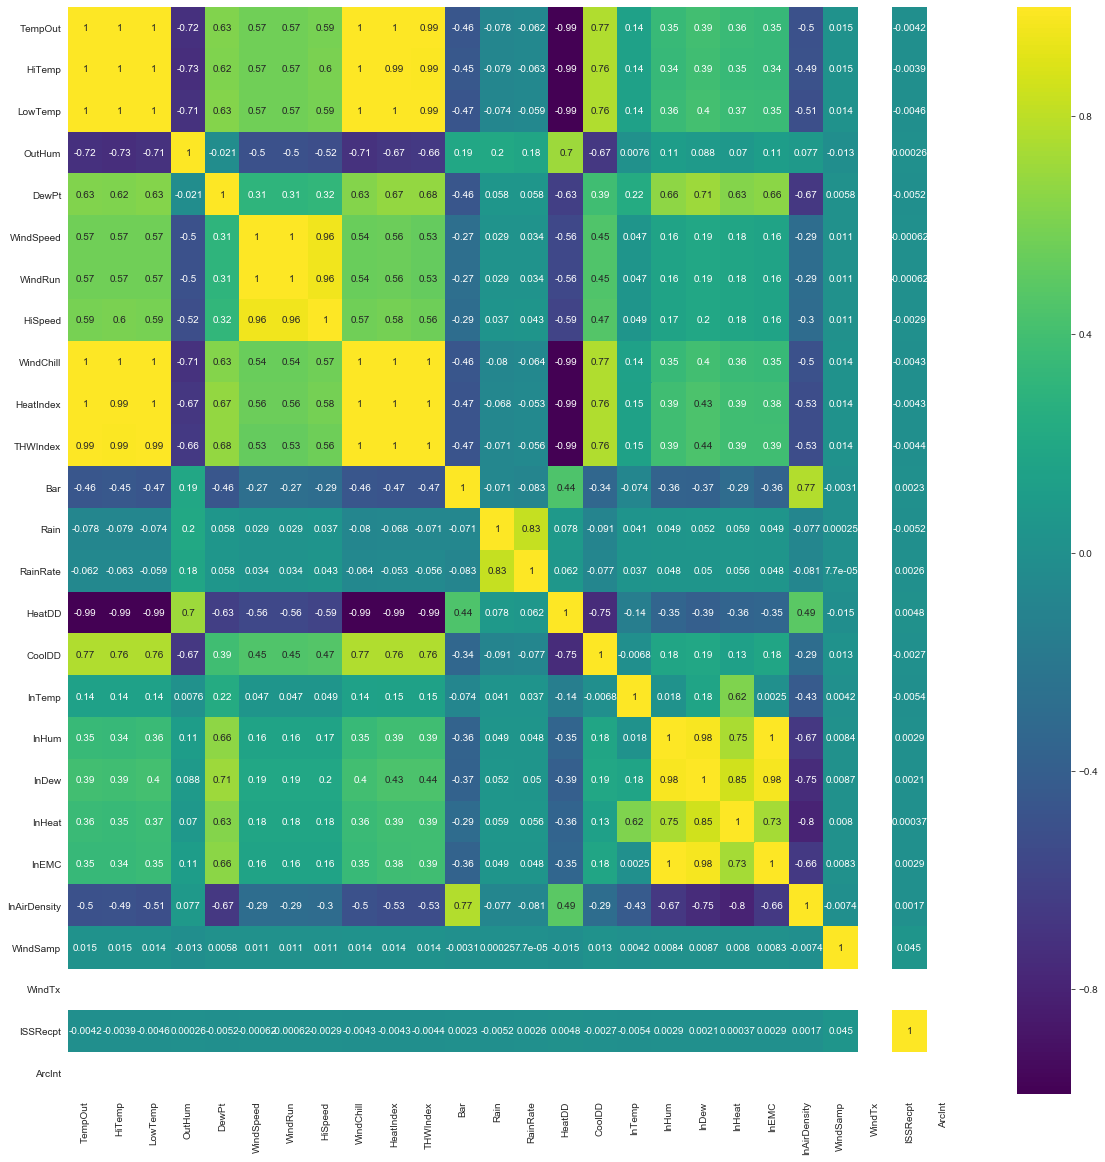

In [9]:
from scipy.stats import spearmanr
corr_matrix=data_mod1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True,cmap = 'viridis')

Observations:

1. WindTx,ArcInt has 0 correlation so need to drop this feature as this does not any value to the data.
2. WindSamp and ISSRecpt has almost 0 correlation with all the other input variables. We can see for any ways to convert these and use these features to construct a model

In [10]:
data_mod1.drop(['ID','DateTime'],axis=1,inplace=True)

#### Variable Inflation Factor for checking multicollinearity
The Variance Inflation Factor (VIF) is a measure of colinearity among input variables within a multiple regression

In [12]:
#https://stats.stackexchange.com/questions/155028/how-to-systematically-remove-collinear-variables-in-python
#https://etav.github.io/python/vif_factor_python.html
from statsmodels.stats.outliers_influence import variance_inflation_factor
var=list(range(data_mod1.shape[1]))
vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(data_mod1.iloc[:, var].values, ix)
               for ix in range(data_mod1.iloc[:, var].shape[1])]
vif['Features']=data_mod1.columns
print("Variance Inflation Factor values")
print("*"*50)
print(vif)

C:\Users\srila\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Variance Inflation Factor values
**************************************************
      VIF values      Features
0   2.246645e+07       TempOut
1   6.609406e+02        HiTemp
2   3.191581e+02       LowTemp
3   2.664789e+01        OutHum
4   2.985874e+01         DewPt
5            inf     WindSpeed
6            inf       WindRun
7   1.122731e+01       HiSpeed
8   2.246853e+07     WindChill
9   2.131593e+07     HeatIndex
10  2.153310e+07      THWIndex
11  1.455541e+02           Bar
12  2.137997e+00          Rain
13  2.076243e+00      RainRate
14  8.543694e+04        HeatDD
15  4.474921e+04        CoolDD
16  2.244822e+02        InTemp
17  5.969054e+02         InHum
18  1.368182e+02         InDew
19  1.152392e+02        InHeat
20  1.782872e+02         InEMC
21  4.512283e+02  InAirDensity
22  2.493382e+00      WindSamp
23  0.000000e+00        WindTx
24  2.492902e+00      ISSRecpt
25  0.000000e+00        ArcInt


C:\Users\srila\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Observations
1. Windspeed, WindRun has infinity as Variation Inflation factor. Need to remove either Windspeed or Windrun as they explain the same variance within the dataset for further analysis.
2. WindTx & ArcInt has 0 Variance Inflation factor so both can be removed from the data set.
3. WindSamp & ISSRecpt has 2.493 as Variation Inflation factor. Need to remove either WindSamp or ISSRecpt as they explain the same variance within the dataset.

#### Removing WindSpeed, WindTx, ISSRecpt,ArcInt as per above observations

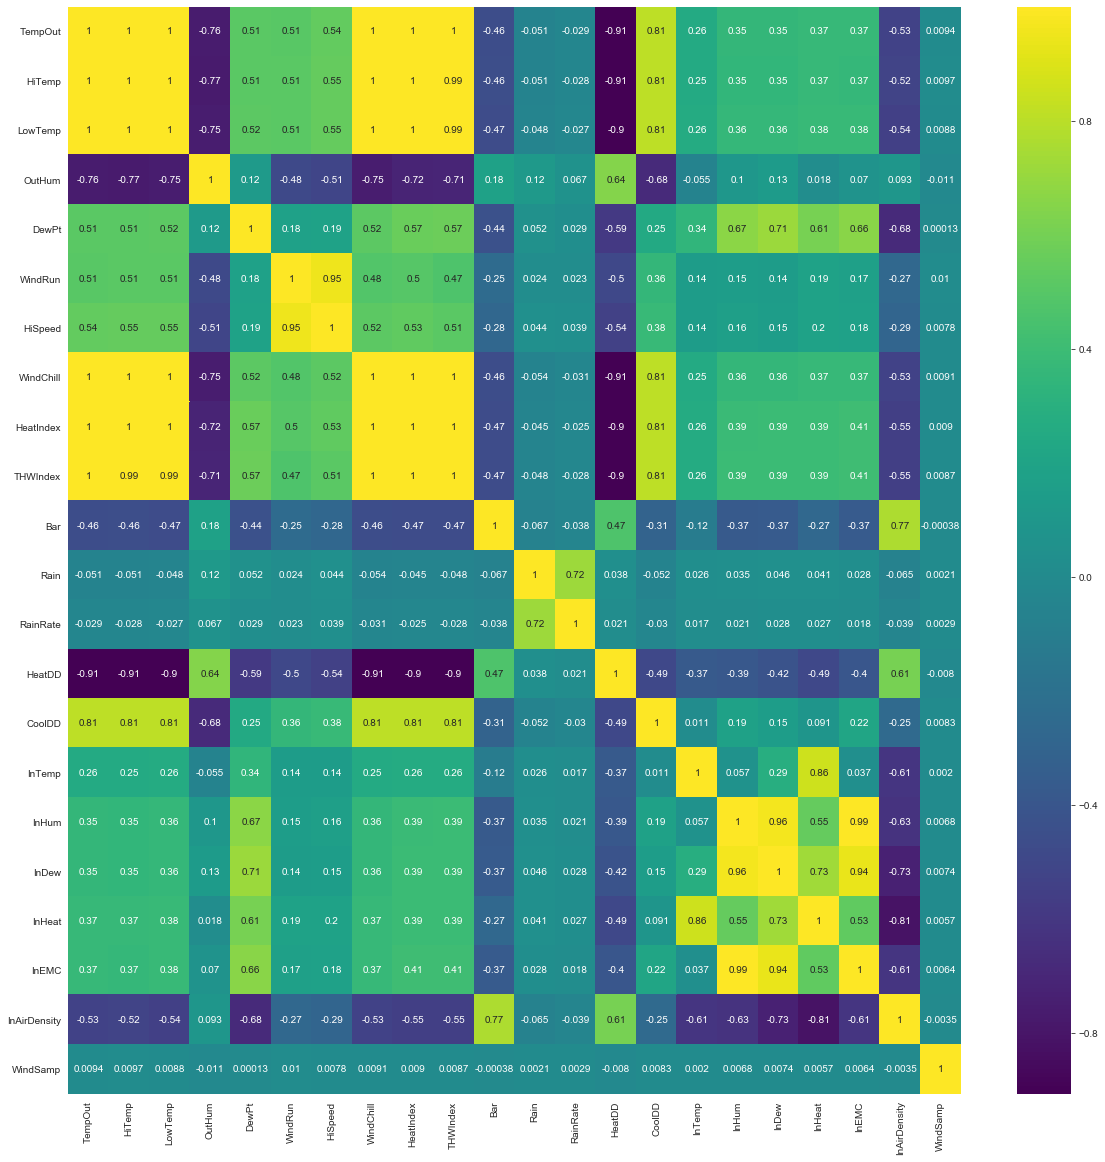

In [16]:
data_mod1.drop(['WindSpeed','WindTx','ISSRecpt','ArcInt'],axis=1,inplace=True)
corr_matrix=data_mod1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True,cmap = 'viridis')

Observations:

1. TempOut,HiTemp,LowTemp and WindChill,HeatIndex,THWIndex are highly correlated as their values are 1.0.
2. HeatDD has negative correlation with many input variables.
3. This data has suffers with multicollinearity as 1 input variable can be linearly predicted using other input variables.
4. This data has input variables with both positive and negative correlations.

#### Variable Inflation Factor for checking multicollinearity after removing the features.

In [17]:
#data=pd.read_csv('train.csv')
#data_mod2=data.drop(['ID','DateTime','WindDir','HiDir','WindSpeed','WindTx','ISSRecpt','ArcInt','PA','PB','PC','PD','PE','PF','PG'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
var=list(range(data_mod1.shape[1]))
vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(data_mod1.iloc[:, var].values, ix)
               for ix in range(data_mod1.iloc[:, var].shape[1])]
vif['Features']=data_mod1.columns
print("Variance Inflation Factor values")
print("*"*50)
print(vif)

Variance Inflation Factor values
**************************************************
      VIF values      Features
0   5.417530e+08       TempOut
1   1.579306e+04        HiTemp
2   7.888574e+03       LowTemp
3   3.516639e+02        OutHum
4   1.140542e+03         DewPt
5   2.515497e+01       WindRun
6   2.887488e+01       HiSpeed
7   5.396512e+08     WindChill
8   5.336829e+08     HeatIndex
9   5.320822e+08      THWIndex
10  6.087825e+06           Bar
11  2.168366e+00          Rain
12  2.085821e+00      RainRate
13  1.533457e+04        HeatDD
14  4.264942e+03        CoolDD
15  2.538391e+05        InTemp
16  7.464862e+03         InHum
17  4.489725e+03         InDew
18  7.265917e+04        InHeat
19  2.677534e+03         InEMC
20  5.893110e+06  InAirDensity
21  2.424477e+05      WindSamp


In [49]:
print(data_mod1.columns)

Index(['TempOut', 'HiTemp', 'LowTemp', 'OutHum', 'DewPt', 'WindRun', 'HiSpeed',
       'WindChill', 'HeatIndex', 'THWIndex', 'Bar', 'Rain', 'RainRate',
       'HeatDD', 'CoolDD', 'InTemp', 'InHum', 'InDew', 'InHeat', 'InEMC',
       'InAirDensity', 'WindSamp'],
      dtype='object')


### Checking for Outliers in INT Fields - OutHum,HiSpeed,InHum

In [19]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =data_mod1["OutHum"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 4
10 percentile value is 42
20 percentile value is 53
30 percentile value is 63
40 percentile value is 71
50 percentile value is 79
60 percentile value is 85
70 percentile value is 89
80 percentile value is 92
90 percentile value is 95
100 percentile value is  98


In [21]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =data_mod1["HiSpeed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 2
30 percentile value is 3
40 percentile value is 4
50 percentile value is 5
60 percentile value is 7
70 percentile value is 8
80 percentile value is 10
90 percentile value is 13
100 percentile value is  33


In [22]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =data_mod1["InHum"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 16
10 percentile value is 30
20 percentile value is 34
30 percentile value is 38
40 percentile value is 42
50 percentile value is 46
60 percentile value is 51
70 percentile value is 55
80 percentile value is 60
90 percentile value is 67
100 percentile value is  88


Observations :

1. No Outliers found in the above INT features

### Removing OutHum,HiSpeed,InHum(as these are INT) to plot Boxplots,distplots & ProbPlots.

In [23]:
data_mod3=data_mod1.drop(['OutHum','HiSpeed','InHum'],axis=1)
print(data_mod3.columns)
print(len(data_mod3.columns))

Index(['TempOut', 'HiTemp', 'LowTemp', 'DewPt', 'WindRun', 'WindChill',
       'HeatIndex', 'THWIndex', 'Bar', 'Rain', 'RainRate', 'HeatDD', 'CoolDD',
       'InTemp', 'InDew', 'InHeat', 'InEMC', 'InAirDensity', 'WindSamp'],
      dtype='object')
19


#https://nbviewer.jupyter.org/github/PBPatil/Exploratory_Data_Analysis-Wine_Quality_Dataset/blob/master/winequality_white.ipynb

#### Plotted BoxPlots, DistPlots, ProbPlots for few features at a time to see if there are any outliers and the how the distribution of the data is

### BoxPlots, DistPlots, ProbPlots for TempOut, HiTemp,LowTemp,DewPt,WindRun

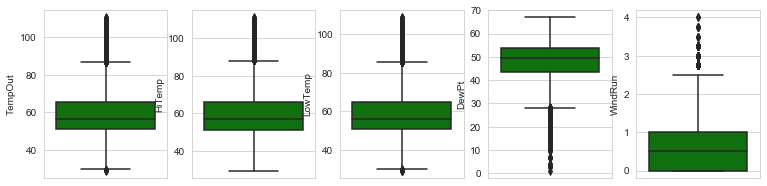

In [27]:
val = data_mod3.columns.values
cols=19
rows = len(val)-1/cols
plt.figure(figsize=(50,70))
for i in range(0,5):
    plt.subplot(rows + 1,cols,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data_mod3[val[i]],color='green',orient='v')
    #plt.tight_layout()

Observations
1. Looking at the box plots, DewPt & WindRun might have some outliers. Other features look good.

C:\Users\srila\AppData\Local\Programs\Python\Python36\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


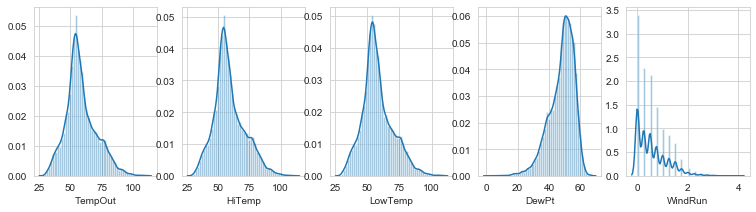

In [28]:
val = data_mod3.columns.values
cols=19
rows = len(val)-1/cols
plt.figure(figsize=(50,70))
for i in range(0,5):
    plt.subplot(rows + 1,cols,i+1)
    #sns.set_style('whitegrid')
    sns.distplot(data_mod3[val[i]],kde=True)
    #plt.tight_layout()

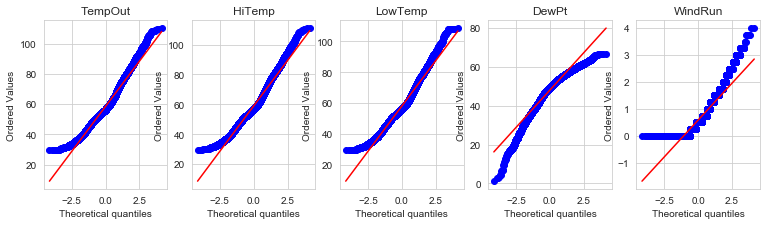

In [30]:
import scipy
val = data_mod3.columns.values
cols=19
rows = len(val)-1/cols
plt.figure(figsize=(50,70))
for i in range(0,5):
    plt.subplot(rows + 1,cols,i+1)
    #sns.set_style('whitegrid')
    scipy.stats.probplot(data_mod3[val[i]].values, plot=plt)
    plt.title(val[i])
    #sns.distplot(data_mod3[val[i]],kde=True)
    #plt.tight_layout()

#### Checking for Outliers in DewPt,WindRun

In [67]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(90,100):
    var =data_mod3["TempOut"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 76.1
91 percentile value is 76.9
92 percentile value is 77.7
93 percentile value is 78.7
94 percentile value is 79.9
95 percentile value is 81.1
96 percentile value is 82.6
97 percentile value is 84.4
98 percentile value is 86.9
99 percentile value is 91.6
100 percentile value is  110.3


In [68]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(90,100):
    var =data_mod3["HiTemp"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 76.9
91 percentile value is 77.7
92 percentile value is 78.5
93 percentile value is 79.6
94 percentile value is 80.7
95 percentile value is 82.0
96 percentile value is 83.4
97 percentile value is 85.3
98 percentile value is 87.7
99 percentile value is 92.3
100 percentile value is  111.0


In [69]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(90,100):
    var =data_mod3["LowTemp"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 75.3
91 percentile value is 76.1
92 percentile value is 76.9
93 percentile value is 77.8
94 percentile value is 79.0
95 percentile value is 80.4
96 percentile value is 81.7
97 percentile value is 83.6
98 percentile value is 86.0
99 percentile value is 90.8
100 percentile value is  108.6


In [31]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(90,100):
    var =data_mod3["DewPt"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 56.9
91 percentile value is 57.1
92 percentile value is 57.4
93 percentile value is 57.8
94 percentile value is 58.1
95 percentile value is 58.5
96 percentile value is 59.0
97 percentile value is 59.5
98 percentile value is 60.1
99 percentile value is 61.2
100 percentile value is  66.9


In [32]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(90,100):
    var =data_mod3["WindRun"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 1.5
91 percentile value is 1.5
92 percentile value is 1.5
93 percentile value is 1.5
94 percentile value is 1.5
95 percentile value is 1.75
96 percentile value is 1.75
97 percentile value is 2.0
98 percentile value is 2.0
99 percentile value is 2.5
100 percentile value is  4.0


Observations:

1. No notable Outliers found in DewPt,WindRun

### Boxplots,Distplots,Probplots for WindChill,HeatIndex,THWIndex,Bar,Rain,RainRate

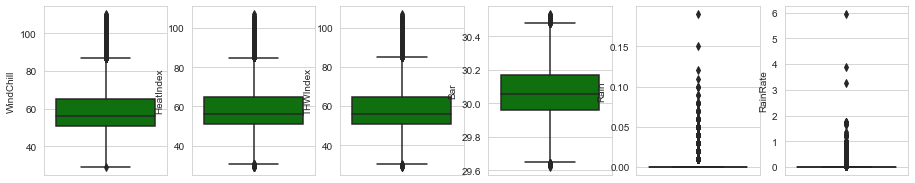

In [35]:
val = data_mod3.columns.values
cols=19
rows = len(val)-1/cols
plt.figure(figsize=(50,70))
for i in range(5,11):
    plt.subplot(rows + 1,cols,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data_mod3[val[i]],color='green',orient='v')
    #plt.tight_layout()

Observaions
1. Rain & RainRate may have outliers. Other features look good.

C:\Users\srila\AppData\Local\Programs\Python\Python36\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


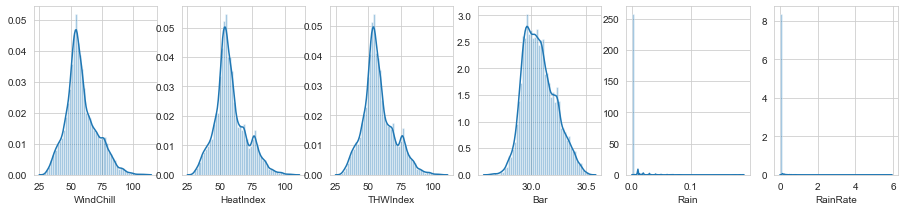

In [36]:
val = data_mod3.columns.values
cols=19
rows = len(val)-1/cols
plt.figure(figsize=(50,70))
for i in range(5,11):
    plt.subplot(rows + 1,cols,i+1)
    #sns.set_style('whitegrid')
    sns.distplot(data_mod3[val[i]],kde=True)
    #plt.tight_layout()

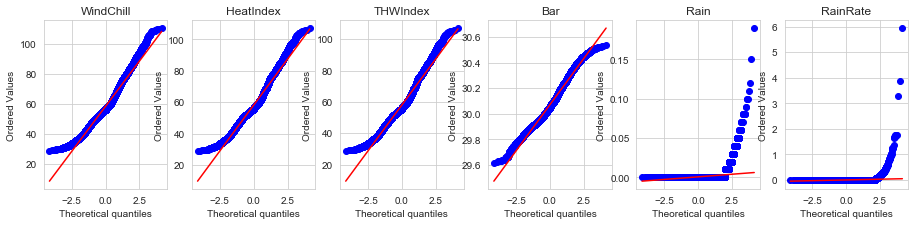

In [37]:
import scipy
val = data_mod3.columns.values
cols=19
rows = len(val)-1/cols
plt.figure(figsize=(50,70))
for i in range(5,11):
    plt.subplot(rows + 1,cols,i+1)
    #sns.set_style('whitegrid')
    scipy.stats.probplot(data_mod3[val[i]].values, plot=plt)
    plt.title(val[i])
    #sns.distplot(data_mod3[val[i]],kde=True)
    #plt.tight_layout()

#### Checking for Outliers in Rain & RainRate

In [61]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(90,100):
    var =data_mod3["WindChill"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 76.0
91 percentile value is 76.8
92 percentile value is 77.6
93 percentile value is 78.7
94 percentile value is 79.8
95 percentile value is 81.1
96 percentile value is 82.6
97 percentile value is 84.4
98 percentile value is 86.9
99 percentile value is 91.6
100 percentile value is  110.3


In [63]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(90,100):
    var =data_mod3["HeatIndex"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 75.9
91 percentile value is 76.5
92 percentile value is 77.2
93 percentile value is 78.1
94 percentile value is 79.1
95 percentile value is 80.3
96 percentile value is 81.9
97 percentile value is 83.8
98 percentile value is 85.8
99 percentile value is 90.0
100 percentile value is  107.1


In [65]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(90,100):
    var =data_mod3["THWIndex"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 75.8
91 percentile value is 76.4
92 percentile value is 77.2
93 percentile value is 78.0
94 percentile value is 79.1
95 percentile value is 80.3
96 percentile value is 81.9
97 percentile value is 83.7
98 percentile value is 85.8
99 percentile value is 90.0
100 percentile value is  107.1


In [66]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =data_mod3["Bar"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 29.619
10 percentile value is 29.904
20 percentile value is 29.945
30 percentile value is 29.98
40 percentile value is 30.017
50 percentile value is 30.055
60 percentile value is 30.094
70 percentile value is 30.141
80 percentile value is 30.201999999999998
90 percentile value is 30.276
100 percentile value is  30.534000000000002


In [57]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =data_mod3["Rain"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.0
90 percentile value is 0.0
100 percentile value is  0.19


In [59]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(90,100):
    var =data_mod3["RainRate"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 0.0
91 percentile value is 0.0
92 percentile value is 0.0
93 percentile value is 0.0
94 percentile value is 0.0
95 percentile value is 0.0
96 percentile value is 0.0
97 percentile value is 0.0
98 percentile value is 0.0
99 percentile value is 0.11
100 percentile value is  5.94


#### No notable outlier found for Rain & RainRate

### BoxPlots,DistPlots,ProbPlots fro CoolDD,InTemp,InDew,InHeat,inEMC

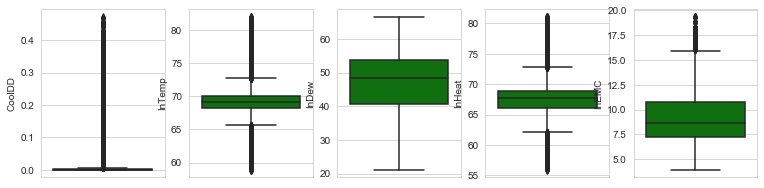

In [40]:
val = data_mod3.columns.values
cols=19
rows = len(val)-1/cols
plt.figure(figsize=(50,70))
for i in range(12,17):
    plt.subplot(rows + 1,cols,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data_mod3[val[i]],color='green',orient='v')
    #plt.tight_layout()

C:\Users\srila\AppData\Local\Programs\Python\Python36\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


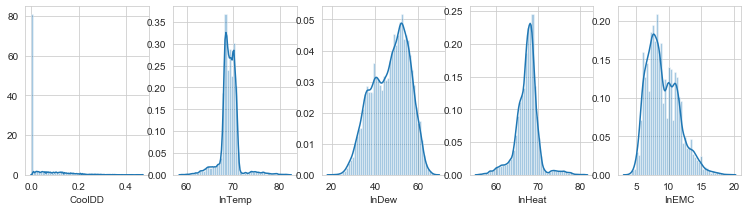

In [41]:
val = data_mod3.columns.values
cols=19
rows = len(val)-1/cols
plt.figure(figsize=(50,70))
for i in range(12,17):
    plt.subplot(rows + 1,cols,i+1)
    #sns.set_style('whitegrid')
    sns.distplot(data_mod3[val[i]],kde=True)
    #plt.tight_layout()

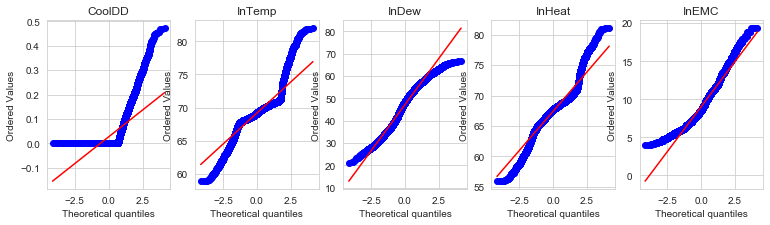

In [42]:
import scipy
val = data_mod3.columns.values
cols=19
rows = len(val)-1/cols
plt.figure(figsize=(50,70))
for i in range(12,17):
    plt.subplot(rows + 1,cols,i+1)
    #sns.set_style('whitegrid')
    scipy.stats.probplot(data_mod3[val[i]].values, plot=plt)
    plt.title(val[i])
    #sns.distplot(data_mod3[val[i]],kde=True)
    #plt.tight_layout()

#### Checking for Outliers in CoolDD

In [43]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(90,100):
    var =data_mod3["CoolDD"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 0.11599999999999999
91 percentile value is 0.124
92 percentile value is 0.132
93 percentile value is 0.14300000000000002
94 percentile value is 0.155
95 percentile value is 0.168
96 percentile value is 0.183
97 percentile value is 0.20199999999999999
98 percentile value is 0.228
99 percentile value is 0.27699999999999997
100 percentile value is  0.47200000000000003


In [51]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =data_mod3["InTemp"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 58.9
10 percentile value is 67.7
20 percentile value is 68.2
30 percentile value is 68.5
40 percentile value is 68.8
50 percentile value is 69.2
60 percentile value is 69.6
70 percentile value is 69.9
80 percentile value is 70.3
90 percentile value is 70.7
100 percentile value is  82.0


In [53]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =data_mod3["InDew"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 21.1
10 percentile value is 35.3
20 percentile value is 39.0
30 percentile value is 42.2
40 percentile value is 45.5
50 percentile value is 48.3
60 percentile value is 50.7
70 percentile value is 52.7
80 percentile value is 54.9
90 percentile value is 57.4
100 percentile value is  66.6


In [55]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =data_mod3["InHeat"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 55.9
10 percentile value is 64.5
20 percentile value is 65.7
30 percentile value is 66.5
40 percentile value is 67.2
50 percentile value is 67.7
60 percentile value is 68.1
70 percentile value is 68.5
80 percentile value is 69.0
90 percentile value is 69.8
100 percentile value is  81.1


In [56]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =data_mod3["InEMC"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 3.94
10 percentile value is 6.25
20 percentile value is 6.85
30 percentile value is 7.53
40 percentile value is 8.03
50 percentile value is 8.64
60 percentile value is 9.44
70 percentile value is 10.19
80 percentile value is 11.05
90 percentile value is 12.35
100 percentile value is  19.36


### BoxPlots,DistPlots,ProbPlots for InAirDensity, WindSamp

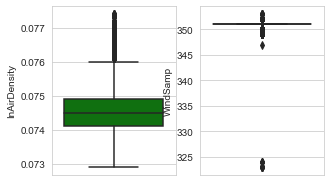

In [45]:
val = data_mod3.columns.values
cols=19
rows = len(val)-1/cols
plt.figure(figsize=(50,70))
for i in range(17,19):
    plt.subplot(rows + 1,cols,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data_mod3[val[i]],color='green',orient='v')
    #plt.tight_layout()

C:\Users\srila\AppData\Local\Programs\Python\Python36\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


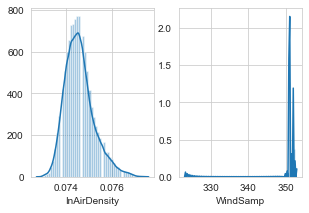

In [46]:
val = data_mod3.columns.values
cols=19
rows = len(val)-1/cols
plt.figure(figsize=(50,70))
for i in range(17,19):
    plt.subplot(rows + 1,cols,i+1)
    #sns.set_style('whitegrid')
    sns.distplot(data_mod3[val[i]],kde=True)
    #plt.tight_layout()

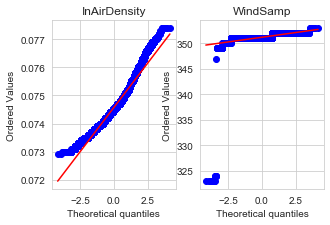

In [47]:
import scipy
val = data_mod3.columns.values
cols=19
rows = len(val)-1/cols
plt.figure(figsize=(50,70))
for i in range(17,19):
    plt.subplot(rows + 1,cols,i+1)
    #sns.set_style('whitegrid')
    scipy.stats.probplot(data_mod3[val[i]].values, plot=plt)
    plt.title(val[i])
    #sns.distplot(data_mod3[val[i]],kde=True)
    #plt.tight_layout()

#### Checking for Outliers

In [50]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =data_mod3["InAirDensity"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0.0729
10 percentile value is 0.0738
20 percentile value is 0.07400000000000001
30 percentile value is 0.0742
40 percentile value is 0.0743
50 percentile value is 0.0745
60 percentile value is 0.0746
70 percentile value is 0.0748
80 percentile value is 0.075
90 percentile value is 0.0754
100 percentile value is  0.0774


In [48]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =data_mod3["WindSamp"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 323
10 percentile value is 351
20 percentile value is 351
30 percentile value is 351
40 percentile value is 351
50 percentile value is 351
60 percentile value is 351
70 percentile value is 351
80 percentile value is 352
90 percentile value is 352
100 percentile value is  353


### EDA Summary

1. As per the EDA on train data, there are 2 categorical variables - WindDir & HiDir & all others are numerical variables(Int & Float).
2. There are 7 labels PA,PB,PC,PD,PE,PF,PG in the train data and using the train data need to predict 7 labels for the given test data.
3. Data description looks good with no outliers as the min,max,percententiles, mean & std are within a range for both train and test data.
4. TempOut is highly correlated with HiTemp,LowTemp,WindChill,HeatIndex,THWIndex and many other variables are highly correlated with each other.
5. HeatDD is negatively correlated with TempOut,HiTemp,LowTemp,WindChill,HeatIndex,THWIndex and many other variables are negatively correlated with each other.
6. This data suffers with multicollinearity problem as this data has postive and negative correaltions.
7. Using Variable inflation factor, measure of collinearity between input variables can be found and avoided for further analysis. 
8. Based on VIF- Windspeed, WindRun has infinity as Variation Inflation factor. Need to remove either Windspeed or Windrun as they explain the same variance within the dataset.
9. WindTx & ArcInt has 0 Variance Inflation factor so both can be removed from the data set.
10. WindSamp & ISSRecpt has 2.493 as Variation Inflation factor. Need to remove either WindSamp or ISSRecpt as they explain the same variance within the dataset.
11.. Almost all the input variables are skewed and target labels are highly correlated.
12. Random Forest & XGBoost are immune to multicollinearity by nature as the tree splits based on the perfectly correlated features. (https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4)

## Training a model based on the features without any feature engineering.

In [2]:
import keras
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import Adam
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Activation, Flatten
from tensorflow.keras.optimizers import Adam,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [27]:
data_train=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")
cols = ['Date' if x=='DateTime' else x for x in list(data_train.columns)]

data_train['Date']=pd.to_datetime(data_train['DateTime'])
data_train.drop(['DateTime'],axis=1,inplace=True)
data_train.sort_values(by=['Date'],inplace=True)
cols = ['Date' if x=='DateTime' else x for x in list(data_test.columns)]

data_test['Date']=pd.to_datetime(data_test['DateTime'])
data_test.drop(['DateTime'],axis=1,inplace=True)
data_test.sort_values(by=['Date'],inplace=True)

data_train['Year'] = data_train['Date'].dt.year
data_train['Month'] = data_train['Date'].dt.month
data_train['Day'] = data_train['Date'].dt.day

data_test['Year'] = data_test['Date'].dt.year
data_test['Month'] = data_test['Date'].dt.month
data_test['Day'] = data_test['Date'].dt.day

print(data_train.columns)
print(data_test.columns)

Index(['ID', 'TempOut', 'HiTemp', 'LowTemp', 'OutHum', 'DewPt', 'WindSpeed',
       'WindDir', 'WindRun', 'HiSpeed', 'HiDir', 'WindChill', 'HeatIndex',
       'THWIndex', 'Bar', 'Rain', 'RainRate', 'HeatDD', 'CoolDD', 'InTemp',
       'InHum', 'InDew', 'InHeat', 'InEMC', 'InAirDensity', 'WindSamp',
       'WindTx', 'ISSRecpt', 'ArcInt', 'PA', 'PB', 'PC', 'PD', 'PE', 'PF',
       'PG', 'Date', 'Year', 'Month', 'Day'],
      dtype='object')
Index(['ID', 'TempOut', 'HiTemp', 'LowTemp', 'OutHum', 'DewPt', 'WindSpeed',
       'WindDir', 'WindRun', 'HiSpeed', 'HiDir', 'WindChill', 'HeatIndex',
       'THWIndex', 'Bar', 'Rain', 'RainRate', 'HeatDD', 'CoolDD', 'InTemp',
       'InHum', 'InDew', 'InHeat', 'InEMC', 'InAirDensity', 'WindSamp',
       'WindTx', 'ISSRecpt', 'ArcInt', 'Date', 'Year', 'Month', 'Day'],
      dtype='object')


In [28]:
label=data_train[['PA', 'PB', 'PC', 'PD','PE', 'PF', 'PG']]
train=data_train.drop(['ID','Date','PA', 'PB', 'PC', 'PD','PE', 'PF', 'PG','ArcInt','WindTx'],axis=1)
test=data_test.drop(['ID','Date','ArcInt','WindTx'],axis=1)
print("Train columns",train.columns)
print("Label columns",label.columns)
print("Test columns",test.columns)

Train columns Index(['TempOut', 'HiTemp', 'LowTemp', 'OutHum', 'DewPt', 'WindSpeed',
       'WindDir', 'WindRun', 'HiSpeed', 'HiDir', 'WindChill', 'HeatIndex',
       'THWIndex', 'Bar', 'Rain', 'RainRate', 'HeatDD', 'CoolDD', 'InTemp',
       'InHum', 'InDew', 'InHeat', 'InEMC', 'InAirDensity', 'WindSamp',
       'ISSRecpt', 'Year', 'Month', 'Day'],
      dtype='object')
Label columns Index(['PA', 'PB', 'PC', 'PD', 'PE', 'PF', 'PG'], dtype='object')
Test columns Index(['TempOut', 'HiTemp', 'LowTemp', 'OutHum', 'DewPt', 'WindSpeed',
       'WindDir', 'WindRun', 'HiSpeed', 'HiDir', 'WindChill', 'HeatIndex',
       'THWIndex', 'Bar', 'Rain', 'RainRate', 'HeatDD', 'CoolDD', 'InTemp',
       'InHum', 'InDew', 'InHeat', 'InEMC', 'InAirDensity', 'WindSamp',
       'ISSRecpt', 'Year', 'Month', 'Day'],
      dtype='object')


In [29]:
x_train,x_test=train,test
y_train=label
print("Data Train, Test shapes:",x_train.shape,x_test.shape)
print("Label Train, Test shapes:",y_train.shape)

Data Train, Test shapes: (40000, 29) (22446, 29)
Label Train, Test shapes: (40000, 7)


#### Vectorizing WindDir, HiDir

In [30]:
from sklearn.preprocessing import LabelEncoder
cols = ('WindDir','HiDir')

for c in cols:
    lbl=LabelEncoder()
    lbl.fit(list(x_train[c].values))
    x_train[c]=lbl.transform(list(x_train[c].values))
    x_test[c]=lbl.transform(list(x_test[c].values))

print("Shape of train,test data",x_train.shape,x_test.shape)

Shape of train,test data (40000, 29) (22446, 29)


#### Vectorizing Numerical features

In [31]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

numerical_cols = list(x_train.columns)

vectorizer = StandardScaler()
vectorizer.fit(x_train[numerical_cols])
x_train[numerical_cols] = vectorizer.transform(x_train[numerical_cols])
x_test[numerical_cols] = vectorizer.transform(x_test[numerical_cols])

#### Models

#### Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

n_estimators = [100,300,500,700,900]
max_depth = [1,3,5,7,9]

random_grid = {'n_estimators' : n_estimators,
              'max_depth' : max_depth}
rf = RandomForestRegressor(max_features='sqrt')

In [33]:
print("Tuning hyper-parameters for ROC_AUC")
print("*"*50)
print()
clf = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 5, n_jobs = -1, scoring='neg_mean_squared_error')
result=clf.fit(x_train,y_train)
    
print("Best Estimator:",clf.best_estimator_)
print("Best Score:",clf.best_score_)
print("Best Params:",clf.best_params_)

Tuning hyper-parameters for ROC_AUC
**************************************************

Best Estimator: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
Best Score: -97274.2143382412
Best Params: {'max_depth': 9, 'n_estimators': 100}


In [35]:
rfr_score = pd.DataFrame()
rfr_score['ID'] = data_test['ID']

In [36]:
from sklearn.metrics import mean_squared_error

rfr=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

output_columns = ['PA','PB','PC','PD','PE','PF','PG']
for i in output_columns:
    y_train_l = y_train[i]
    #y_test_l = y_test[i]
    rfr.fit(x_train,y_train_l)
    test_predict = rfr.predict(x_test)
    train_predict=rfr.predict(x_train)
    print("RMSE scores for:",i)
    print("*"*50)
    #rmse_test=np.sqrt(mean_squared_error(y_test_l, test_predict))
    #print("Test RMSE is :",rmse_test)
    #score_test=max(0,(100 - rmse_test))
    #print("Test Score is:",score_test)
    rmse_train=np.sqrt(mean_squared_error(y_train_l, train_predict))
    print("Train RMSE is:",np.sqrt(mean_squared_error(y_train_l, train_predict)))
    score_train=max(0,(100 - rmse_train))
    print("Train Score is:",score_train)
    print("*"*50)
    rfr_score[i] = [ round(p,0) for p in test_predict]

RMSE scores for: PA
**************************************************
Train RMSE is: 212.3624664652438
Train Score is: 0
**************************************************
RMSE scores for: PB
**************************************************
Train RMSE is: 102.34676106224074
Train Score is: 0
**************************************************
RMSE scores for: PC
**************************************************
Train RMSE is: 57.54735702024344
Train Score is: 42.45264297975656
**************************************************
RMSE scores for: PD
**************************************************
Train RMSE is: 31.64813397108407
Train Score is: 68.35186602891594
**************************************************
RMSE scores for: PE
**************************************************
Train RMSE is: 21.91043609727262
Train Score is: 78.08956390272738
**************************************************
RMSE scores for: PF
**************************************************
Train RMSE is: 

In [37]:
print(rfr_score)

           ID      PA      PB     PC     PD     PE     PF     PG
0     PR40001  1883.0   911.0  527.0  338.0  223.0  139.0  115.0
1     PR40002  2095.0  1032.0  562.0  351.0  213.0  149.0  112.0
2     PR40003  1999.0   959.0  541.0  343.0  233.0  140.0  114.0
3     PR40004  2037.0  1035.0  565.0  364.0  216.0  152.0  112.0
4     PR40005  2146.0  1052.0  583.0  375.0  237.0  154.0  117.0
5     PR40006  2076.0   981.0  581.0  367.0  246.0  146.0  121.0
6     PR40007  2152.0   982.0  590.0  363.0  222.0  156.0  115.0
7     PR40008  2203.0  1048.0  597.0  370.0  236.0  158.0  117.0
8     PR40009  1976.0   961.0  567.0  347.0  234.0  140.0  119.0
9     PR40010  2263.0  1058.0  595.0  373.0  234.0  158.0  117.0
10    PR40011  1957.0   958.0  575.0  353.0  238.0  140.0  120.0
11    PR40012  2306.0  1079.0  597.0  376.0  233.0  161.0  120.0
12    PR40013  2344.0  1080.0  608.0  377.0  243.0  157.0  119.0
13    PR40014  2012.0   981.0  559.0  351.0  233.0  141.0  117.0
14    PR40015  2288.0  10

In [55]:
rfr_score.to_csv("test_scores_eda_rfr.csv")

#### XGBoost

In [38]:
import xgboost as xgb

# initialize Our first XGBoost model...
xgbr = xgb.XGBRegressor(silent=False, random_state=15)
#regr = MultiOutputRegressor(regr1)

# declare parameters for hyperparameter tuning
parameters = {'learning_rate':[0.001,0.01,0.1,0.15,0.2],'n_estimators':[100,300,500,700,900,1100],'max_depth':[1,3,5,7,9,11]} 

# Perform cross validation 
clf = GridSearchCV(xgbr,
                    param_grid = parameters,
                    scoring="neg_mean_squared_error",
                    cv=10,
                    n_jobs = -1,
                    verbose = 1)

output_columns = ['PA','PB','PC','PD','PE','PF','PG']
for i in output_columns:
    y_train_l = y_train[i]
    result = clf.fit(x_train, y_train_l)
    print("Best Parameters for:",i)
    print("*"*50)
    print("Best Estimator:",clf.best_estimator_)
    print("Best Score:",clf.best_score_)
    print("Best Params:",clf.best_params_)
    print("*"*50)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 51.9min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 103.9min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 162.5min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 250.1min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 258.7min finished


[03:54:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Parameters for: PA
**************************************************
Best Estimator: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=15,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=False, subsample=1, verbosity=1)
Best Score: -122913.64456468185
Best Params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
**************************************************
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 51.8min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 103.7min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 162.3min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 250.5min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 258.6min finished


[08:13:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Parameters for: PB
**************************************************
Best Estimator: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=15,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=False, subsample=1, verbosity=1)
Best Score: -27790.391450822855
Best Params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
**************************************************
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   42.2s


KeyboardInterrupt: 

In [39]:
import xgboost as xgb
xgb_scores = pd.DataFrame()
xgb_scores['ID'] = data_test['ID']

In [41]:
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")
xgbr= xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=15,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=False, subsample=1, verbosity=1)

output_columns = ['PA','PB','PC','PD','PE','PF','PG']
for i in output_columns:
    y_train_l = y_train[i]
    #y_test_l = y_test[i]
    xgbr.fit(x_train,y_train_l)
    test_predict = xgbr.predict(x_test)
    train_predict=xgbr.predict(x_train)
    print("RMSE scores for:",i)
    print("*"*50)
    #rmse_test=np.sqrt(mean_squared_error(y_test_l, test_predict))
    #print("Test RMSE is :",rmse_test)
    #score_test=max(0,(100 - rmse_test))
    #print("Test Score is:",score_test)
    rmse_train=np.sqrt(mean_squared_error(y_train_l, train_predict))
    print("Train RMSE is:",np.sqrt(mean_squared_error(y_train_l, train_predict)))
    score_train=max(0,(100 - rmse_train))
    print("Train Score is:",score_train)
    print("*"*50)
    xgb_scores[i] = [ round(p,0) for p in test_predict]

[08:26:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE scores for: PA
**************************************************
Train RMSE is: 108.3126842605122
Train Score is: 0
**************************************************
[08:26:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE scores for: PB
**************************************************
Train RMSE is: 53.89643721591441
Train Score is: 46.10356278408559
**************************************************
[08:27:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE scores for: PC
**************************************************
Train RMSE is: 30.043703321318393
Train Score is: 69.95629667868161
*******

In [42]:
print(xgb_scores)

           ID      PA      PB     PC     PD     PE     PF     PG
0     PR40001  2731.0  1323.0  724.0  434.0  280.0  192.0  138.0
1     PR40002  2731.0  1323.0  724.0  434.0  280.0  192.0  138.0
2     PR40003  2731.0  1323.0  724.0  434.0  280.0  192.0  138.0
3     PR40004  2731.0  1323.0  724.0  434.0  280.0  192.0  138.0
4     PR40005  2731.0  1323.0  724.0  434.0  280.0  192.0  138.0
5     PR40006  2731.0  1323.0  724.0  434.0  280.0  192.0  138.0
6     PR40007  2731.0  1323.0  724.0  434.0  280.0  192.0  138.0
7     PR40008  2731.0  1323.0  724.0  434.0  280.0  192.0  138.0
8     PR40009  2731.0  1323.0  724.0  434.0  280.0  192.0  138.0
9     PR40010  2731.0  1323.0  724.0  434.0  280.0  192.0  138.0
10    PR40011  2731.0  1323.0  724.0  434.0  280.0  192.0  138.0
11    PR40012  2731.0  1323.0  724.0  434.0  280.0  192.0  138.0
12    PR40013  2731.0  1323.0  724.0  434.0  280.0  192.0  138.0
13    PR40014  2731.0  1323.0  724.0  434.0  280.0  192.0  138.0
14    PR40015  2731.0  13

In [54]:
xgb_scores.to_csv("test_scores_eda_xgb.csv")

#### Pretty Table

In [45]:
from prettytable import PrettyTable

t = PrettyTable()

t.field_names =  ["Model","Label", "RMSE", "score = max(0,(100 - rmse))"]

t.add_row(["Random Forest","PA",212.36,0])
t.add_row(["","PB",102.35,0])
t.add_row(["","PC",57.55,42.45])
t.add_row(["","PD",31.65,68.35])
t.add_row(["","PE",21.91,78.08])
t.add_row(["","PF",16.01,83.99])
t.add_row(["","PA",10.30,89.69])
t.add_row(["","","",""])
t.add_row(["XGBoost","PA",108.31,0])
t.add_row(["","PB",53.89,46.10])
t.add_row(["","PC",30.04,69.95])
t.add_row(["","PD",18.25,81.74])
t.add_row(["","PE",11.91,88.08])
t.add_row(["","PF",8.28,91.71])
t.add_row(["","PA",6.02,93.97])

print(t)

+---------------+-------+--------+-----------------------------+
|     Model     | Label |  RMSE  | score = max(0,(100 - rmse)) |
+---------------+-------+--------+-----------------------------+
| Random Forest |   PA  | 212.36 |              0              |
|               |   PB  | 102.35 |              0              |
|               |   PC  | 57.55  |            42.45            |
|               |   PD  | 31.65  |            68.35            |
|               |   PE  | 21.91  |            78.08            |
|               |   PF  | 16.01  |            83.99            |
|               |   PA  |  10.3  |            89.69            |
|               |       |        |                             |
|    XGBoost    |   PA  | 108.31 |              0              |
|               |   PB  | 53.89  |             46.1            |
|               |   PC  | 30.04  |            69.95            |
|               |   PD  | 18.25  |            81.74            |
|               |   PE  |

### EDA Summary

1. As per the EDA on train data, there are 2 categorical variables - WindDir & HiDir & all others are numerical variables(Int & Float).
2. There are 7 labels PA,PB,PC,PD,PE,PF,PG in the train data and using the train data need to predict 7 labels for the given test data.
3. Data description looks good with no outliers as the min,max,percententiles, mean & std are within a range for both train and test data.
4. TempOut is highly correlated with HiTemp,LowTemp,WindChill,HeatIndex,THWIndex and many other variables are highly correlated with each other.
5. HeatDD is negatively correlated with TempOut,HiTemp,LowTemp,WindChill,HeatIndex,THWIndex and many other variables are negatively correlated with each other.
6. This data suffers with multicollinearity problem as this data has postive and negative correaltions.
7. Using Variable inflation factor, measure of collinearity between input variables can be found and avoided for further analysis. 
8. Based on VIF- Windspeed, WindRun has infinity as Variation Inflation factor. Need to remove either Windspeed or Windrun as they explain the same variance within the dataset.
9. WindTx & ArcInt has 0 Variance Inflation factor so both can be removed from the data set.
10. WindSamp & ISSRecpt has 2.493 as Variation Inflation factor. Need to remove either WindSamp or ISSRecpt as they explain the same variance within the dataset.
11.. Almost all the input variables are skewed and target labels are highly correlated.
12. Random Forest & XGBoost are immune to multicollinearity by nature as the tree splits based on the perfectly correlated features. (https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4)

### Basic Model Summary:

1. As per the EDA there are 2 categorical featureas and rest are numerical features.
2. Used label encoding on categorical features & standardised all the data.
3. Trained a Random Forest model & recorded RMSE for 7 labels. 
4. RMSE's & scores are not as expected and this data needs some feature engineering to get lower RMSE and higher scores.
5. srilaxmik15@gmail.com_27_model_train_test - In this notebook, I have used some feature engineering to lower the RMSE and increase the scores.